In [1]:
#Load libraries
# system
import os

#data manipulation
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# importing classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score

#evaluation metrices
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, roc_auc_score, auc, precision_score, recall_score, classification_report, roc_curve, accuracy_score, f1_score

In [2]:
#saving directories
os.listdir("C:/Users/PranjalJain/Documents/Personal-20191024T082552Z-001/Project2/data")

['.ipynb_checkpoints',
 '.RData',
 '.RDataTmp',
 '.Rhistory',
 'C50Rules.txt',
 'correlation.csv',
 'DataN0106.pdf',
 'Histogram.png',
 'mycode.R',
 'rplot.pdf',
 'rplot_100.pdf',
 'submission.csv',
 'submission_smot.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

In [3]:
#load data
san_train=pd.read_csv("train.csv")
san_test=pd.read_csv("test.csv")

In [4]:
san_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
san_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [6]:
san_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [7]:
san_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [8]:
san_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [9]:
san_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


Train Variance:
 target       0.090392
var_0        9.241909
var_1       16.402858
var_2        6.974322
var_3        4.175153
              ...    
var_195      2.043105
var_196     29.750144
var_197      0.849394
var_198      9.065793
var_199    108.952159
Length: 201, dtype: float64 
Test Variance:
 var_0        9.221642
var_1       16.325714
var_2        6.937368
var_3        4.213674
var_4        2.612931
              ...    
var_195      2.043980
var_196     29.662679
var_197      0.848065
var_198      9.052379
var_199    108.130651
Length: 200, dtype: float64


Variance: Most of the component have variance are quite up and down, hence, variable informations are to be visualized for understanding of the data.

In [11]:
# Looking Skewness
print('Train skewness:\n',san_train.skew(),'\nTest skewness:\n', san_test.skew())

Train skewness:
 target     2.657642
var_0      0.235639
var_1      0.053115
var_2      0.260313
var_3     -0.003548
             ...   
var_195    0.124048
var_196   -0.032527
var_197   -0.031094
var_198   -0.170156
var_199   -0.164349
Length: 201, dtype: float64 
Test skewness:
 var_0      0.225450
var_1      0.044262
var_2      0.262869
var_3     -0.003339
var_4     -0.035520
             ...   
var_195    0.119211
var_196   -0.029103
var_197   -0.035822
var_198   -0.180523
var_199   -0.165171
Length: 200, dtype: float64


In [12]:
# Missing value analysis
print('Train missing values:',san_train.isnull().sum().sum())
print('Test missing values:',san_test.isnull().sum().sum())

Train missing values: 0
Test missing values: 0


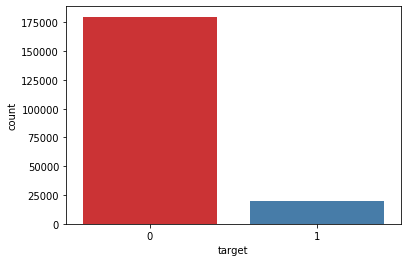

In [13]:
sns.countplot(san_train['target'], palette='Set1')

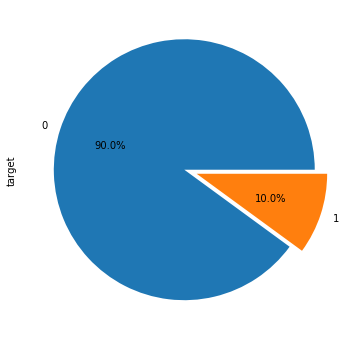

In [14]:
plt.figure(figsize=(10,6))
san_train['target'].value_counts().plot.pie(autopct='%1.1f%%', explode=([0,0.1]))
plt.show()

# Outlier_analysis

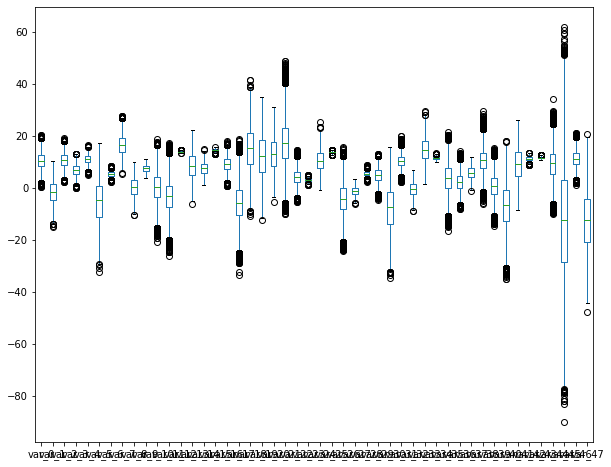

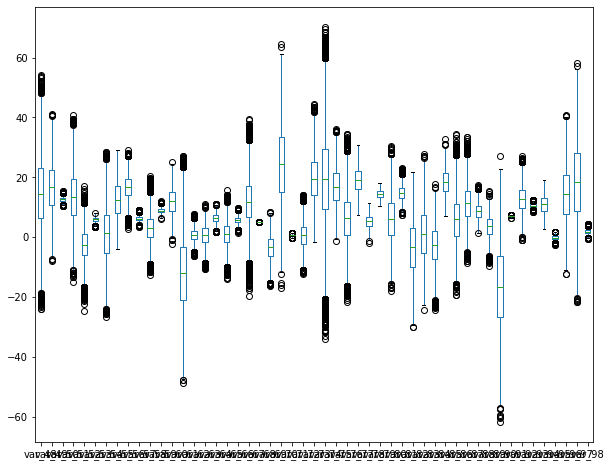

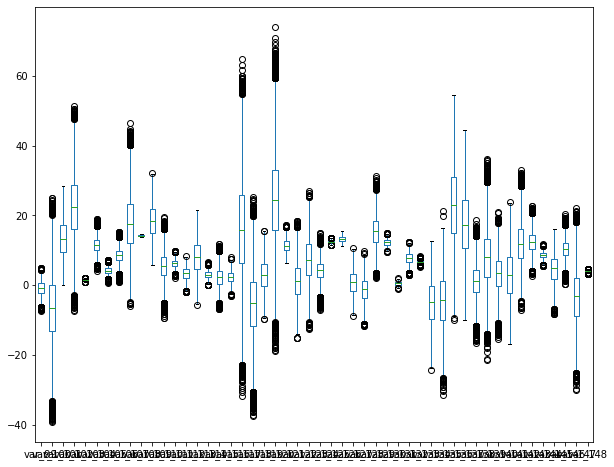

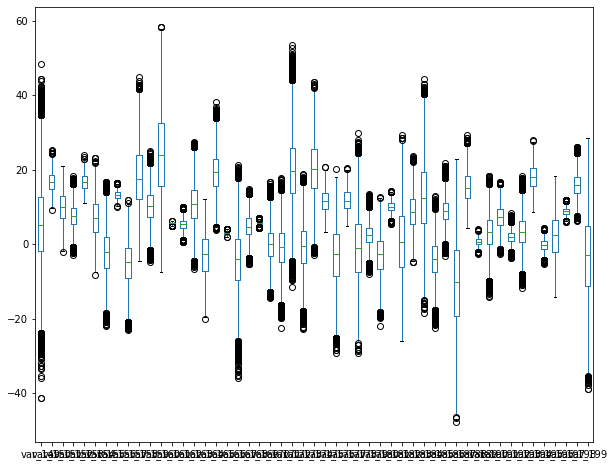

In [41]:
# Boxplot Analysis
# Plot  features.
san_train.iloc[:, 2:50].plot(kind='box', figsize=[10,8])
san_train.iloc[:, 50:101].plot(kind='box', figsize=[10,8])
san_train.iloc[:, 101:151].plot(kind='box', figsize=[10,8])
san_train.iloc[:, 151:].plot(kind='box', figsize=[10,8])

In [16]:
#Remove Outlier 
train_x=san_train.iloc[:,1:]
IQR = train_x.quantile(.75) - train_x.quantile(.25)
df_in = san_train[~((train_x < (train_x.quantile(.25) - 1.5 * IQR)) |(train_x > (train_x.quantile(.75) + 1.5 * IQR))).any(axis=1)]
df_out = san_train[((train_x < (train_x.quantile(.25) - 1.5 * IQR)) |(train_x > (train_x.quantile(.75) + 1.5 * IQR))).any(axis=1)]

In [17]:
df_in.shape

(157999, 202)

In [18]:
df_out.shape

(42001, 202)

In [19]:
print(df_in['target'].value_counts())

0    157999
Name: target, dtype: int64


In [20]:
print(df_out['target'].value_counts())

0    21903
1    20098
Name: target, dtype: int64


In [21]:
print(san_train['target'].value_counts())

0    179902
1     20098
Name: target, dtype: int64


We can't remove outliers because all class1 are outliers

### Correlation Analysis

In [22]:
# Correlation Analysis
data_corr=san_train.drop(['target','ID_code'], axis=1).corr()
print('Maximum corr within all variables correlations :', np.sort(san_train.drop(['target','ID_code'], axis=1).corr())[:,-2:-1].max())

Maximum corr within all variables correlations : 0.009713658349534146


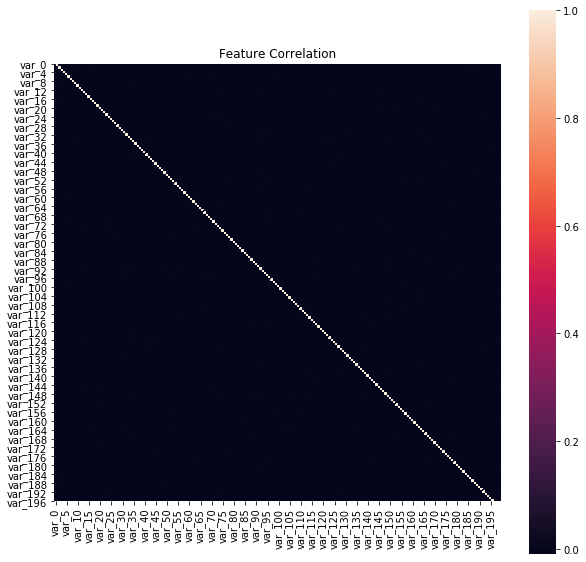

In [23]:
# Correlation Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, square=True)
plt.title('Feature Correlation')
plt.show()

# Modeling

In [24]:
# Using Stratified sampling
X_train, X_test, y_train, y_test = train_test_split(san_train.drop(['target', 'ID_code'], axis=1), san_train['target'], test_size=0.2, random_state=147, stratify=san_train.target)
print('Shape:',X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape: (160000, 200) (40000, 200) (160000,) (40000,)


In [25]:
def ErrorMetric(y,y_pred):
    print("confusion matrix",confusion_matrix(y, y_pred))
    print("recall",recall_score(y,y_pred))
    print("precision",precision_score(y,y_pred))
    print("f1_score",f1_score(y,y_pred))
    

In [26]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#Predict the value
y_pred = lr.predict(X_test)
ErrorMetric(y_test,y_pred)

confusion matrix [[35518   462]
 [ 2959  1061]]
recall 0.2639303482587065
precision 0.6966513460275772
f1_score 0.38282518491791445


In [28]:
###### DecisionTree Modelling ##########
def DT(depth):
    dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth = depth)
    dt_model = dt.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print('depth : {} ----  Decision Tree : {}'.format(depth,ErrorMetric(y_test,y_pred)))

    
for depth in [1,2,5,10,20,30,40,50]:
    DT(depth)


confusion matrix [[35980     0]
 [ 4020     0]]
recall 0.0
precision 0.0
f1_score 0.0
depth : 1 ----  Decision Tree : None


C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


confusion matrix [[35980     0]
 [ 4020     0]]
recall 0.0
precision 0.0
f1_score 0.0
depth : 2 ----  Decision Tree : None


C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


confusion matrix [[35944    36]
 [ 3994    26]]
recall 0.006467661691542288
precision 0.41935483870967744
f1_score 0.012738853503184712
depth : 5 ----  Decision Tree : None
confusion matrix [[35512   468]
 [ 3821   199]]
recall 0.04950248756218906
precision 0.2983508245877061
f1_score 0.08491572434393002
depth : 10 ----  Decision Tree : None
confusion matrix [[33671  2309]
 [ 3342   678]]
recall 0.16865671641791044
precision 0.22698359558085035
f1_score 0.19352076494933637
depth : 20 ----  Decision Tree : None
confusion matrix [[32758  3222]
 [ 3264   756]]
recall 0.1880597014925373
precision 0.19004524886877827
f1_score 0.18904726181545387
depth : 30 ----  Decision Tree : None
confusion matrix [[32636  3344]
 [ 3222   798]]
recall 0.19850746268656716
precision 0.1926605504587156
f1_score 0.1955403087478559
depth : 40 ----  Decision Tree : None
confusion matrix [[32598  3382]
 [ 3256   764]]
recall 0.1900497512437811
precision 0.18427399903521466
f1_score 0.18711731569924075
depth : 50

In [29]:
from sklearn.ensemble import RandomForestClassifier
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    print('depth : {}, n_estimators : {}  ---- Random Forest Regression : {}'.format(depth, n_est,ErrorMetric(y_test,y_pred)))  

for n_est in [100, 200]:
    for depth in [2, 5, 10 , 20, 30]:
        train_RF(n_est, depth)

confusion matrix [[35980     0]
 [ 4020     0]]
recall 0.0
precision 0.0
f1_score 0.0
depth : 2, n_estimators : 100  ---- Random Forest Regression : None


C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


confusion matrix [[35980     0]
 [ 4020     0]]
recall 0.0
precision 0.0
f1_score 0.0
depth : 5, n_estimators : 100  ---- Random Forest Regression : None


C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


confusion matrix [[35980     0]
 [ 4020     0]]
recall 0.0
precision 0.0
f1_score 0.0
depth : 10, n_estimators : 100  ---- Random Forest Regression : None


C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


confusion matrix [[35980     0]
 [ 4020     0]]
recall 0.0
precision 0.0
f1_score 0.0
depth : 20, n_estimators : 100  ---- Random Forest Regression : None


C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


confusion matrix [[35980     0]
 [ 4019     1]]
recall 0.0002487562189054726
precision 1.0
f1_score 0.0004973887092762993
depth : 30, n_estimators : 100  ---- Random Forest Regression : None
confusion matrix [[35980     0]
 [ 4020     0]]
recall 0.0
precision 0.0
f1_score 0.0
depth : 2, n_estimators : 200  ---- Random Forest Regression : None


C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


confusion matrix [[35980     0]
 [ 4020     0]]
recall 0.0
precision 0.0
f1_score 0.0
depth : 5, n_estimators : 200  ---- Random Forest Regression : None


C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


confusion matrix [[35980     0]
 [ 4020     0]]
recall 0.0
precision 0.0
f1_score 0.0
depth : 10, n_estimators : 200  ---- Random Forest Regression : None


C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


confusion matrix [[35980     0]
 [ 4020     0]]
recall 0.0
precision 0.0
f1_score 0.0
depth : 20, n_estimators : 200  ---- Random Forest Regression : None


C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


confusion matrix [[35980     0]
 [ 4020     0]]
recall 0.0
precision 0.0
f1_score 0.0
depth : 30, n_estimators : 200  ---- Random Forest Regression : None


C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PranjalJain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model_1 = GaussianNB().fit(X_train, y_train)

In [31]:
#predict test cases
NB_Predictions_1 = NB_model_1.predict(X_test)

In [32]:
ErrorMetric(y_test,NB_Predictions_1)

confusion matrix [[35426   554]
 [ 2603  1417]]
recall 0.35248756218905475
precision 0.7189244038559107
f1_score 0.4730428976798532


In [39]:
#Apply Naive Bayes without Standardization, StratifiedKFlod and SMOTE oversampling on data.
san_test1=san_test.drop(['ID_code'],axis=1)
final_pred = NB_model_1.predict(san_test1)
#saving it to CSV
submit=pd.DataFrame({'ID_code':san_test['ID_code'].values})
submit['target']=final_pred.astype(int)
submit.to_csv('submission.csv',index=False)
